# Lab 3 Kryhina CS422a

## task 1
### Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFraрейму, а тaкож поміняти мітки стовпців так, щоб вони були тaким ['Country', 'Ener y Supply', 'Energy Supply per Capit', Renewle]

In [68]:
import pandas as pd
import numpy as np
import re
from decimal import Decimal

file_path = "En_In.xls"

energy_data = pd.read_excel(
    file_path,
    skiprows=17,         
    nrows=245 - 17,       
    usecols="C:F",        
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']   
)

## task 2
### Переведіть дані із стовпчику ‘Energy Supply’ в гДж

In [71]:
df = pd.DataFrame(energy_data)

df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce') * 1000000
energy_data['Energy Supply'] = df['Energy Supply']


## task 3
### Перейменуйте наступний список країн

In [74]:
country_rename_map = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_data['Country'] = energy_data['Country'].replace(country_rename_map)

## task 4
### Видалити в назві цифри та/або дужких

In [77]:
energy_data['Country'] = energy_data['Country'].apply(
    lambda x: re.sub(r'\s*\d+|\s*\(.*?\)', '', x) if isinstance(x, str) else x
)

energy_data.loc[energy_data['Country'].isin(['American Samoa','South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


## task 5
### Завантажити дані про ВВП у і переймевати наступний список країн : 
"Korea, Rep.": "South Kore" 
"Iran, Islamic Rep.": "In, 
"Hong Kong SAR, China": "Hong Kong

In [80]:
import chardet

file_path = "gpd.csv"

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

gdp_data = pd.read_csv(file_path, skiprows=4, encoding=encoding)

country_rename_map = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_data['Country Name'] = gdp_data['Country Name'].replace(country_rename_map)

gdp_data.loc[gdp_data['Country Name'].isin(['Iran','South Korea', 'Hong Kong'])]


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.500820e+10,6.072406e+10,6.552689e+10,7.014134e+10,7.608598e+10,8.904776e+10,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.757696e+10,2.893825e+10,2.964966e+10,3.247578e+10,3.493136e+10,3.674434e+10,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


## task 6
### Завантажити дані з файлу „scimagojr.xlsx”

In [82]:
file_path = "scimagojr.xlsx"
scimago_data = pd.read_excel(file_path)


## task 7
### Приєднати три набори даних із завдань 1-6 до нового набору даних )

In [84]:
scimago_data = scimago_data[scimago_data['Rank'] <= 15]


gdp_data = gdp_data[['Country Name', '2006', '2007', '2008', '2009', '2010',
                     '2011', '2012', '2013', '2014', '2015']]

gdp_data.rename(columns={'Country Name': 'Country'}, inplace=True)

In [85]:
merged_data = pd.merge(scimago_data, energy_data, on='Country')
merged_data = pd.merge(merged_data, gdp_data, on='Country')

merged_data.set_index('Country', inplace=True)
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
           'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
           '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013', '2014', '2015']
final_data = merged_data[columns]

final_data.head(20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


## task 8
### Створити функцію, щоб визначити середній ВВП країн за останні 10 років

In [87]:
def calculate_average_gdp(dataframe):
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', 
                   '2011', '2012', '2013', '2014', '2015']
    
    average_gdp = dataframe[gdp_columns].mean(axis=1)
    
    return average_gdp.sort_values(ascending=False)

average_gdp_series = calculate_average_gdp(final_data)

print(average_gdp_series)

Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


## task 9
### Створити функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.


In [89]:
def calculate_gdp_change_for_fifth(dataframe):
    
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', 
                   '2011', '2012', '2013', '2014', '2015']
   
    average_gdp = dataframe[gdp_columns].mean(axis=1)
    
    fifth_country = average_gdp.sort_values(ascending=False).index[4]
    
    gdp_change = dataframe.loc[fifth_country, '2015'] - dataframe.loc[fifth_country, '2006']
    
    return (fifth_country, gdp_change)

country_gdp_change = calculate_gdp_change_for_fifth(final_data)

print(country_gdp_change)


('Brazil', 474343725980.5698)


## task 10
### Створити функцію, щоб визначити, в якій країні встановлено максимум 
поновлюваних джерел енергії (% Renewable) та який саме відсоток


In [91]:
def get_max_renewable_country(dataframe):

    max_country = dataframe['% Renewable'].idxmax()
    
    max_value = dataframe.loc[max_country, '% Renewable']
    
    return (max_country, max_value)

max_renewable = get_max_renewable_country(final_data)

print(max_renewable)


('Brazil', 69.64803)


## task 11
### Створити стовпець, в якому оцінюється чисельність населення. . Яка країна є шостою за цією оцінкою?


In [93]:
def calculate_population_and_find_sixth(dataframe):

    dataframe['Population Estimate'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita']

    sorted_population = dataframe.sort_values(by='Population Estimate', ascending=False)
    
    sixth_country = sorted_population.iloc[5] 
    
    return (sixth_country.name, sixth_country['Population Estimate'])

sixth_population = calculate_population_and_find_sixth(final_data)

print(sixth_population)


('Germany', 80369696.96969697)


## task 12
###   Створити стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? 


In [95]:
def calculate_citations_per_person_and_correlation(dataframe):

    if 'Population Estimate' not in dataframe.columns:
        dataframe['Population Estimate'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita']
    
    dataframe['Citations per Person'] = dataframe['Citations'] / dataframe['Population Estimate']

    correlation = dataframe['Citations per Person'].corr(dataframe['Energy Supply per Capita'])
    
    return correlation

correlation_result = calculate_citations_per_person_and_correlation(final_data)

print(f"Кореляція між цитованими документами на душу населення та енергозабезпеченням на душу населення: {correlation_result:.2f}")


Кореляція між цитованими документами на душу населення та енергозабезпеченням на душу населення: 0.75


## task 13
###   Створити новий стовпчик в який занести 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.


In [97]:
def create_renewable_flag(dataframe):

    median_renewable = dataframe['% Renewable'].median()
    
    dataframe['Renewable Flag'] = (dataframe['% Renewable'] >= median_renewable).astype(int)
    
    return dataframe.sort_values(by='Rank')['Renewable Flag']


renewable_flag_series = create_renewable_flag(final_data)


print(renewable_flag_series)


Country
China                 1
Japan                 0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Flag, dtype: int32


## task 14
###  Згрупувати країни за континентами.


In [99]:
def group_by_continent_and_calculate(dataframe, continent_dict):
    
    dataframe['Continent'] = dataframe.index.map(continent_dict)
    
    grouped = dataframe.groupby('Continent')['Population Estimate']
    
    result = grouped.agg(['size', 'sum', 'mean', 'std'])
    
    return result

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

final_data['Population Estimate'] = final_data['Energy Supply'] / final_data['Energy Supply per Capita']

continent_stats = group_by_continent_and_calculate(final_data, ContinentDict)

continent_stats.head(5)


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,5,394058699.474436,78811739.894887,3.813228e+07
North America,1,35239864.864865,35239864.864865,NaN
South America,1,205915254.237288,205915254.237288,NaN


## task 15
### Створіть бульбашкову діаграму, що відображає залежність % поновлюван их джерел від рейтингу країни


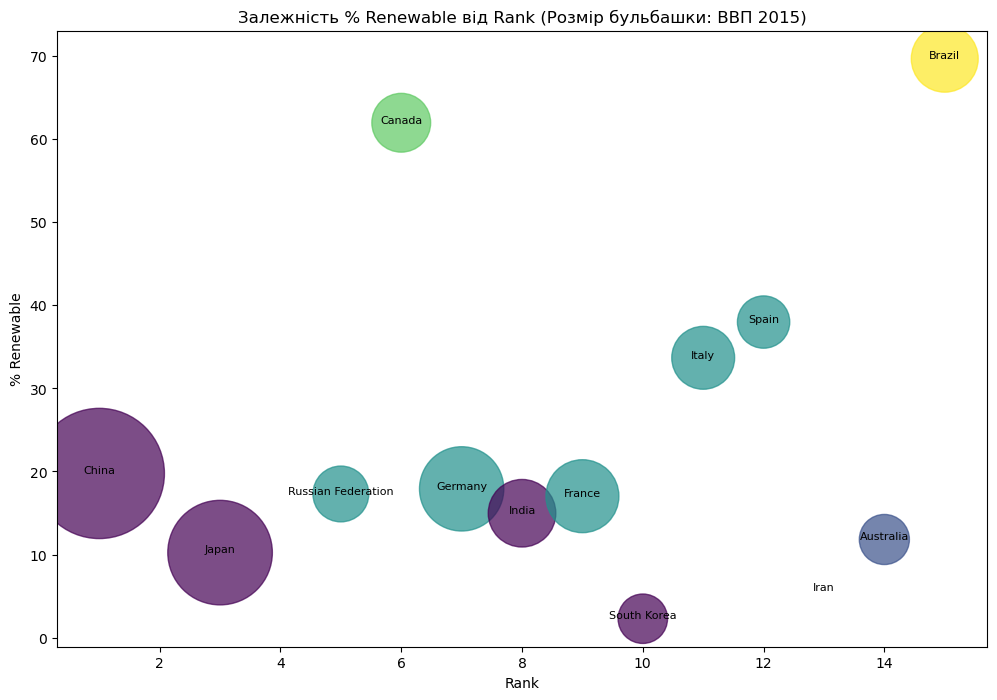

In [101]:
import matplotlib.pyplot as plt

def create_bubble_chart_with_labels(dataframe, continent_dict):

    dataframe['Continent'] = dataframe.index.map(continent_dict)

    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(
        dataframe['Rank'],                  
        dataframe['% Renewable'],          
        s=dataframe['2015'] / 1e9,         
        c=dataframe['Continent'].astype('category').cat.codes,  
        alpha=0.7,
        cmap='viridis'
    )

    for i, country in enumerate(dataframe.index):
        plt.text(
            dataframe['Rank'].iloc[i],
            dataframe['% Renewable'].iloc[i],
            country,
            fontsize=8,
            ha='center'
        )

    plt.xlabel("Rank")
    plt.ylabel("% Renewable")

    plt.title("Залежність % Renewable від Rank (Розмір бульбашки: ВВП 2015)")

    plt.show()

create_bubble_chart_with_labels(final_data, ContinentDict)
